#### Implement Classification Tree on Synthetic Data

In [1]:
import idx2numpy
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from decisiontree import ClassificationTree
from decision_tree_utils import *

##### 1. Classification Tree using Gini impurity with no regulation on manually generated two-class data

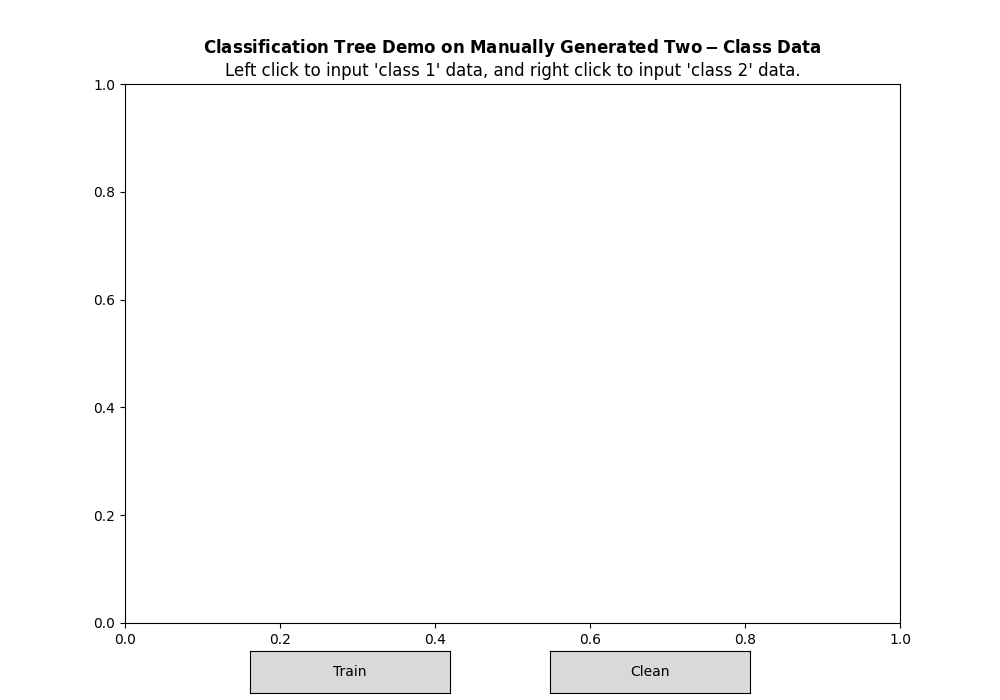

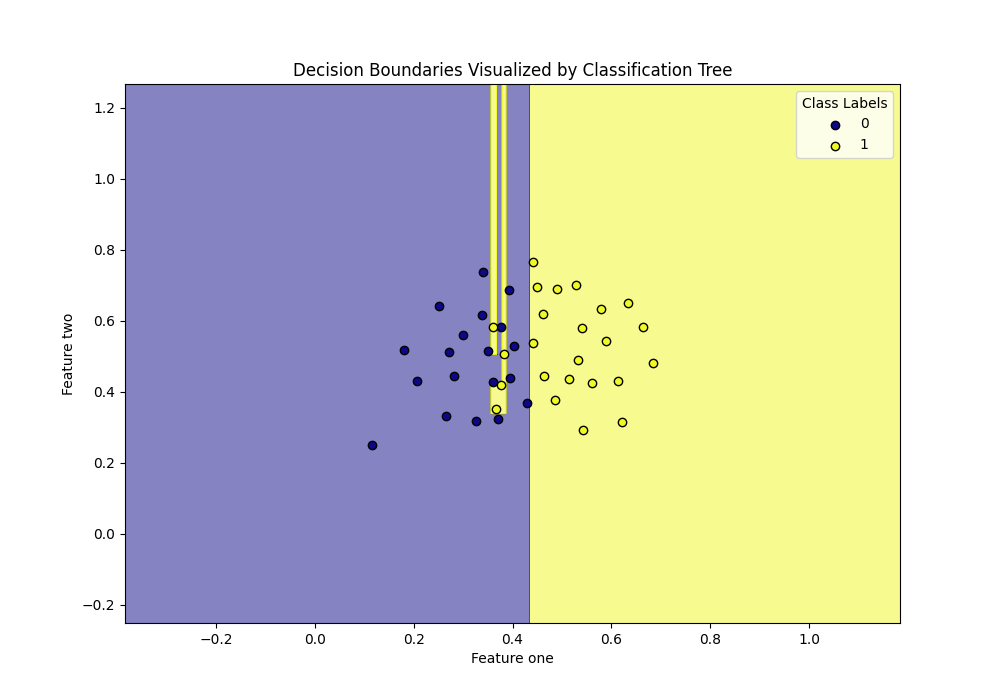

In [4]:
%matplotlib widget
interactive_data_collection_classification()

##### 2. Classification Tree using Gini impurity with no regulation on non-linearly separable multi-class data

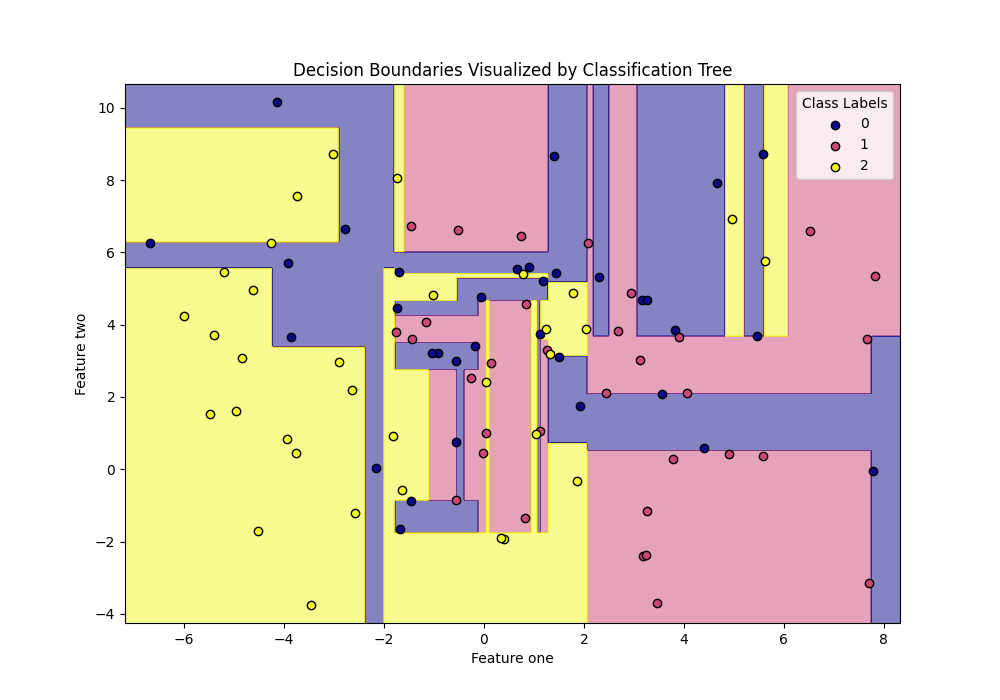

In [5]:
X,y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=3, random_state=0)
tree = ClassificationTree(criterion='gini')
tree.fit(X, y)

# Plot decision boundary and class labels
create_contour_plot(tree, X, y, resolution=500)

##### 3. Classification Tree using Entropy with no regulation on non-linearly separable multi-class data

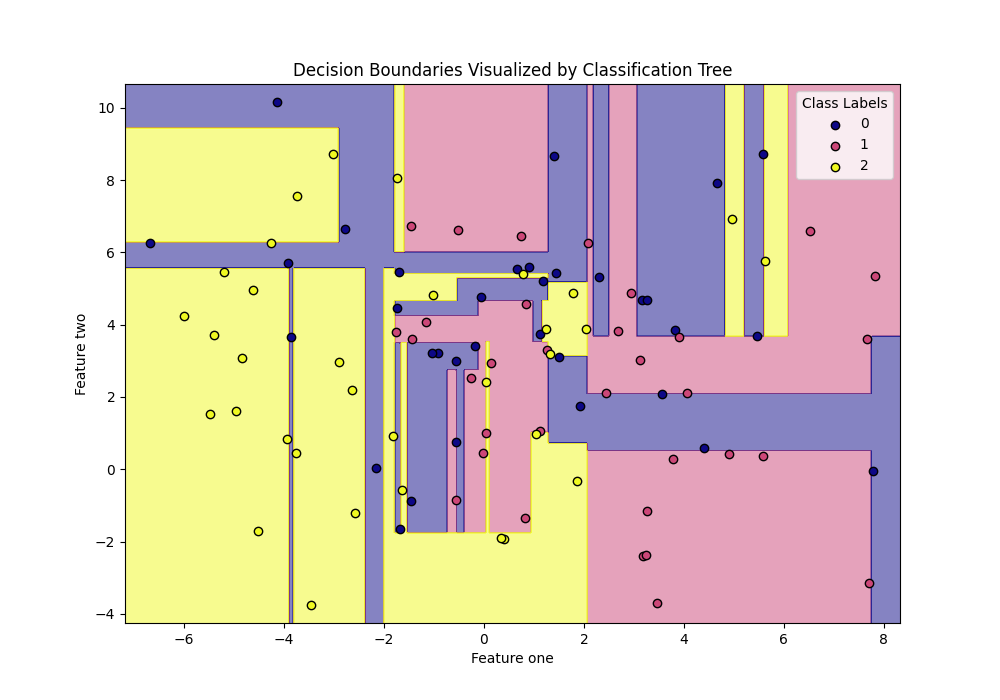

In [6]:
X,y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=3, random_state=0)
tree = ClassificationTree(criterion='entropy')
tree.fit(X, y)

# Plot decision boundary and class labels
create_contour_plot(tree, X, y, resolution=500)

#### Implement Classification Tree on Predicting Marketing Target

In [2]:
# Load Data
market_data = pd.read_csv('./dataset/Social_Network_Ads.csv', header=0)

# Remove the First Column
market_data = market_data.drop(market_data.columns[0], axis=1)

# Training Set
train_X = market_data.iloc[0:300, 0:-1].values
train_Y = market_data.iloc[0:300:, -1].values

# Test Set
test_X = market_data.iloc[300:, 0:-1].values
test_Y = market_data.iloc[300:, -1].values

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        38
           1       0.98      0.84      0.90        62

    accuracy                           0.89       100
   macro avg       0.88      0.91      0.89       100
weighted avg       0.91      0.89      0.89       100



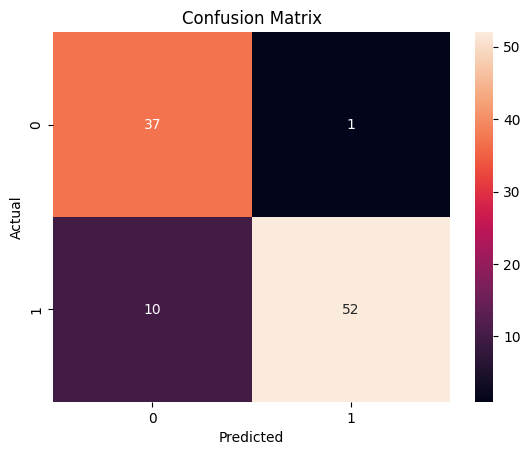

Decision Boundary with Training Data


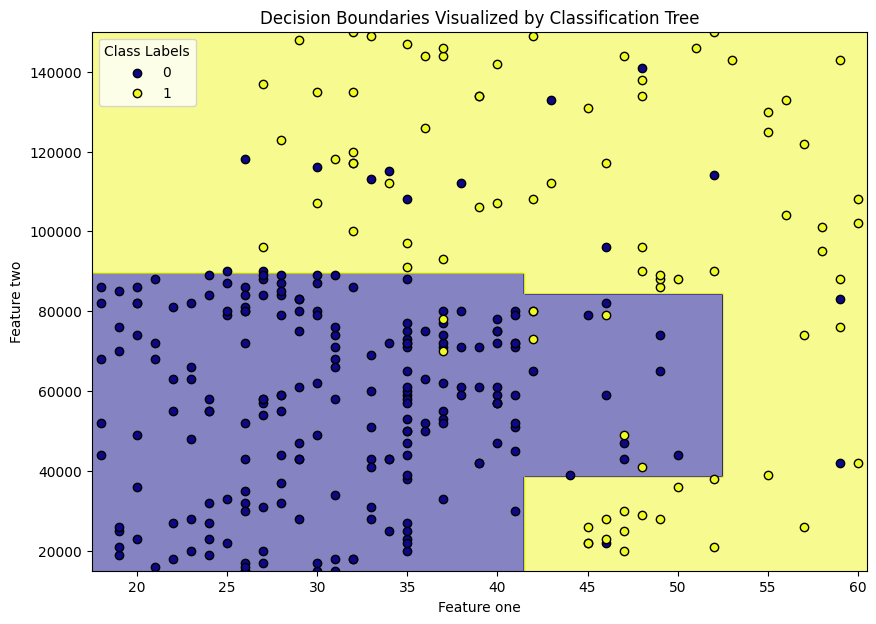

Decision Boundary with Testing Data


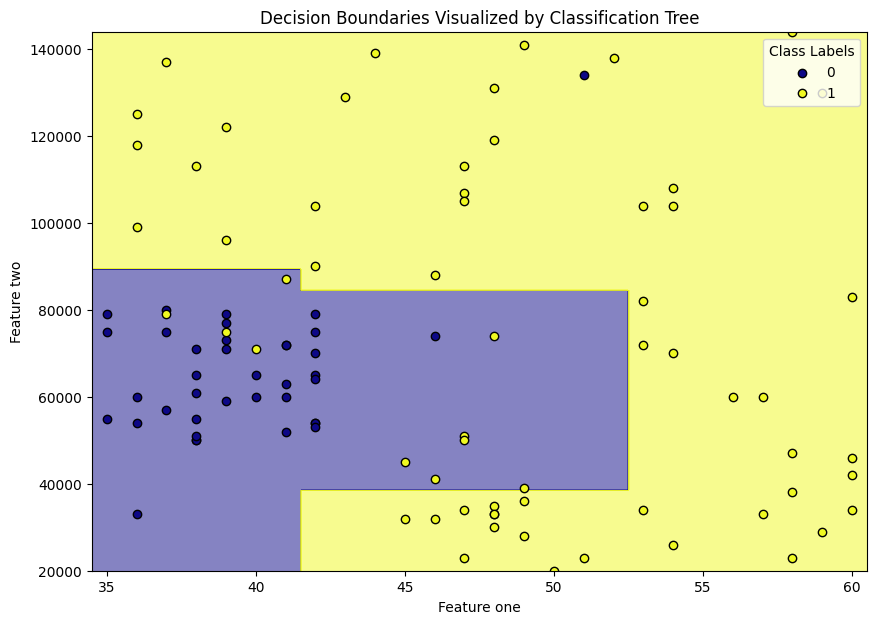

In [3]:
# Fit the model
tree = ClassificationTree(criterion='gini', min_split_samples=8, min_leaf_samples=4)
tree.fit(train_X, train_Y)

# Evaluate model performance on training data
pred_Y = np.array([tree.predict_class(x) for x in test_X])
evaluate_model(test_Y, pred_Y, 'classification')

# Plot the decision boundary and the true labels
print('Decision Boundary with Training Data')
create_contour_plot(tree, train_X, train_Y, resolution=500)

# Plot the decision boundary and the true labels
print('Decision Boundary with Testing Data')
create_contour_plot(tree, test_X, test_Y, resolution=500)

#### Implement Classification Tree on Hand Written Digits

In [7]:
# Load Training and Testing Data Sets
try:
    train_set = idx2numpy.convert_from_file(
        './dataset/train-images.idx3-ubyte')
    train_label = idx2numpy.convert_from_file(
        './dataset/train-labels.idx1-ubyte')
    test_set = idx2numpy.convert_from_file(
        './dataset/t10k-images.idx3-ubyte')
    test_label = idx2numpy.convert_from_file(
        './dataset/t10k-labels.idx1-ubyte')
except FileNotFoundError as e:
    print("One or more data files not found.")
    print(e)
    exit()
    
# Select first 1000 training and first 500 testing data
train_set = train_set[:1000]
train_label = train_label[:1000]
test_set = test_set[:500]
test_label = test_label[:500]

# Normalize input images
train_images = train_set / 255
test_images = test_set / 255

# Reshape image size from 2D to 1D
train_X = train_images.reshape(len(train_set), -1)
test_X = test_images.reshape(len(test_set), -1)

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        42
           1       0.72      0.84      0.77        67
           2       0.60      0.56      0.58        55
           3       0.50      0.56      0.53        45
           4       0.68      0.65      0.67        55
           5       0.52      0.58      0.55        50
           6       0.67      0.37      0.48        43
           7       0.70      0.86      0.77        49
           8       0.79      0.47      0.59        40
           9       0.73      0.59      0.65        54

    accuracy                           0.65       500
   macro avg       0.65      0.64      0.63       500
weighted avg       0.66      0.65      0.64       500



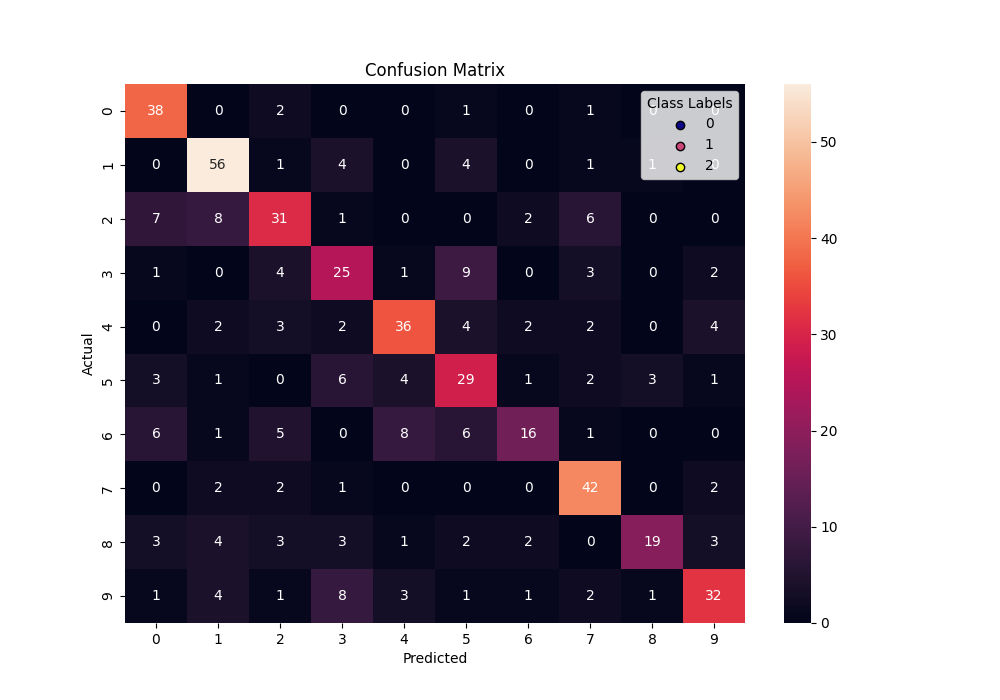

In [8]:
# Fit the model
tree = ClassificationTree(criterion='gini', min_split_samples=8, min_leaf_samples=4)
tree.fit(train_X, train_label)

# Evaluate model performance on training data
pred_Y = np.array([tree.predict_class(x) for x in test_X])
evaluate_model(test_label, pred_Y, 'classification')